In [1]:
from ipynb.fs.full.gbs import *

# Experiments

### Spoof Haar

```
                       ┌─────────────┐
[Detector] ◄──[ent]──► │             │──► [Detector]
[Detector] ◄──[ent]──► │             │──► [Detector]
[Detector] ◄──[ent]──► │ Haar-Random │──► [Detector]
[Detector] ◄──[ent]──► │   Unitary   │──► [Detector]
[Detector] ◄──[ent]──► │             │──► [Detector]
[Detector] ◄──[ent]──► │             │──► [Detector]
                       └─────────────┘
```

In [2]:
def spoof_haar(num_src, N=1000):
    m = 2*num_src
    ents = [ent(N, r=1) for i in range(num_src)]
    l_ents = np.concatenate(tuple([ent[0] for ent in ents]))
    r_ents = np.concatenate(tuple([ent[1] for ent in ents]))
    haar_U = qr_haar(m)
    r_ents = haar_U @ r_ents
    return threshold_detector(l_ents), threshold_detector(r_ents)

[[False False False ... False False False]
 [False False  True ... False False False]
 [False False  True ... False False False]
 ...
 [False False  True ... False False False]
 [False False False ... False False False]
 [False False  True ... False False False]]


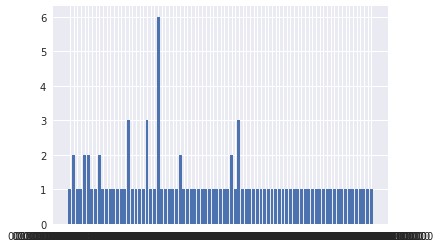

In [3]:
l_res, r_res = spoof_haar(10, N=100)
print(l_res)

def tup_to_bin(tup):
    return "".join(str(int(item)) for item in tup)

lcounts = get_all_coincidence_counts(l_res)
sortedCounts = []
bins = []
counts = []
for tup in lcounts:
    bins.append(tup_to_bin(tup))
    counts.append(lcounts[tup])
    sortedCounts.append((lcounts[tup], tup_to_bin(tup)))
plt.bar(bins, counts)
plt.show()
# print(sorted(sortedCounts, reverse=True))
# print(get_all_coincidence_counts(r_res))
# print_all_coincidence_counts(l_res)
# print_all_coincidence_counts(r_res)

In [4]:
print(ent(17,r=1))

(array([[ 0.11136694+0.47724436j,  0.61414232+0.36114136j,
         1.41801047+0.11299122j,  0.02825179-1.36228373j,
        -0.89732345-0.49516147j,  0.36961072+0.23748155j,
         0.3543429 +0.87134714j, -0.20243765-0.22650619j,
        -0.74474007-0.28389338j, -0.61146432-0.22867604j,
        -1.37543327+0.12268877j, -1.02451456-0.71406556j,
        -0.76034249+0.51441913j,  0.15194204-0.01149708j,
        -1.42553324+1.33495609j, -1.0198147 -1.14237091j,
        -0.2517038 +0.04601729j],
       [ 0.15063213+1.17465602j,  0.37694143-1.22994718j,
        -1.0315867 +0.63971937j, -0.76512111+0.46408315j,
        -2.95520966+0.10090665j,  0.25417264-0.13560092j,
         1.28460248+0.20799916j,  0.83910738-0.79980619j,
        -0.04451082-1.37779309j, -1.5882843 -1.018503j  ,
         0.10554326+0.81970552j,  1.22296082+0.16946055j,
        -0.47164514-0.23908127j,  0.03138973-0.42592158j,
        -0.52018377+0.30888046j,  0.1210724 +0.36450625j,
         0.01159918+1.99993815j]]), a